In [4]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
df=pd.read_csv("/Users/apple/Desktop/Machine Learning/Machine learning assignment/bpp_training_data.csv")
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,17,1974,17,0,4593,...,0,1,8,6,0,0,1989,1,17,17
1,1821514,14000.0,1194089,10150,132,31,1980,31,0,1820,...,0,0,0,0,4,2,1989,1,31,31
2,1505138,50000.0,1473654,4139,132,31,1978,31,0,2348,...,0,1,8,6,0,0,1989,1,31,31
3,1671174,16000.0,1327630,8591,132,31,1980,31,0,1819,...,0,0,0,0,4,2,1989,1,31,31
4,1329056,22000.0,1336053,4089,132,31,1984,31,0,2119,...,0,1,6,5,0,0,1989,1,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2192279,16500.0,1701366,6272,136,78,1000,78,0,4215,...,0,0,0,0,0,0,2009,3,19,78
299996,2192338,17000.0,1787662,12919,136,78,1000,78,0,4216,...,0,0,0,0,0,0,2009,3,19,78
299997,2433168,11500.0,1714162,9580,136,78,2005,78,0,4514,...,0,0,0,0,0,0,2009,3,19,78
299998,1586638,32000.0,1386512,11398,132,78,2005,78,3,1202,...,0,1,6,6,0,0,2009,3,19,78


In [5]:
df.columns 
df.shape

(300000, 56)

In [6]:
X=df.drop('SalePrice',axis=1)
X.shape 
y=df['SalePrice'] 
y.shape

(300000,)

In [7]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)
VarianceThreshold(threshold=0)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [46]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train_sc, X_test_sc, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0) 

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
    

In [49]:
scaler=sc.fit(X_train_sc)
X_train_sc=scaler.transform(X_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [48]:
X_train.shape, X_test.shape


((210000, 55), (90000, 55))

In [10]:
X_train.corr()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear
SalesID,1.000000,0.200082,0.184648,0.758119,-0.019065,-0.091048,-0.019065,0.091208,0.146758,0.161550,...,0.047838,-0.037517,-0.041054,-0.037092,-0.002899,-0.003166,0.427314,-0.018917,-0.011534,-0.019065
MachineID,0.200082,1.000000,0.125731,0.200104,-0.001196,-0.094845,-0.001196,-0.070528,0.061129,0.063384,...,-0.037772,-0.054977,-0.069270,-0.038421,0.011270,0.005761,-0.045093,-0.000757,-0.006168,-0.001196
ModelID,0.184648,0.125731,1.000000,0.038288,-0.003731,-0.102575,-0.003731,0.092696,0.154560,0.165109,...,0.052679,-0.111414,-0.120957,-0.105983,-0.026642,-0.027934,0.071046,-0.003464,-0.007093,-0.003731
datasource,0.758119,0.200104,0.038288,1.000000,-0.051757,0.021986,-0.051757,-0.124035,0.014358,0.017746,...,-0.000351,0.006672,0.006749,0.007079,0.016659,0.015991,0.148629,-0.051046,-0.010384,-0.051757
auctioneerID,-0.019065,-0.001196,-0.003731,-0.051757,1.000000,0.013811,1.000000,-0.009567,-0.019929,-0.019386,...,-0.003665,-0.000040,0.000810,0.000481,-0.025197,-0.024803,-0.048819,0.996886,-0.041239,1.000000
YearMade,-0.091048,-0.094845,-0.102575,0.021986,0.013811,1.000000,0.013811,0.039001,-0.176329,-0.175721,...,-0.053978,0.025541,0.026735,0.020069,0.012387,0.013154,-0.037155,0.013711,0.001291,0.013811
MachineHoursCurrentMeter,-0.019065,-0.001196,-0.003731,-0.051757,1.000000,0.013811,1.000000,-0.009567,-0.019929,-0.019386,...,-0.003665,-0.000040,0.000810,0.000481,-0.025197,-0.024803,-0.048819,0.996886,-0.041239,1.000000
UsageBand,0.091208,-0.070528,0.092696,-0.124035,-0.009567,0.039001,-0.009567,1.000000,0.013010,0.021907,...,-0.002104,-0.002127,-0.008210,-0.005073,-0.023495,-0.022288,0.200992,-0.010191,0.000975,-0.009567
fiModelDesc,0.146758,0.061129,0.154560,0.014358,-0.019929,-0.176329,-0.019929,0.013010,1.000000,0.991913,...,0.087007,0.163794,0.169980,0.160557,0.131431,0.132103,0.021869,-0.019665,-0.004874,-0.019929
fiBaseModel,0.161550,0.063384,0.165109,0.017746,-0.019386,-0.175721,-0.019386,0.021907,0.991913,1.000000,...,0.106791,0.109978,0.115125,0.108053,0.119910,0.120429,0.036803,-0.019185,-0.004483,-0.019386


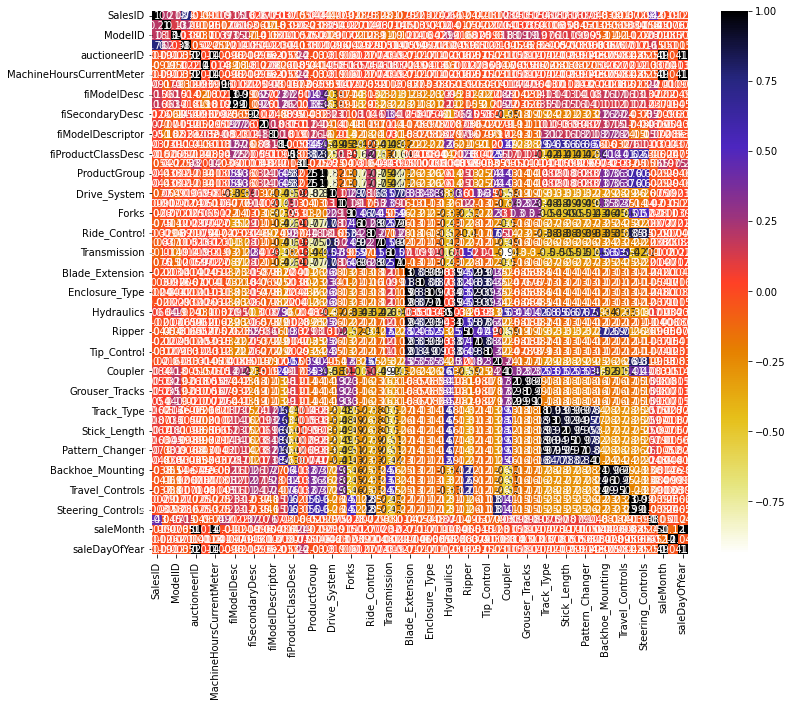

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [13]:
corr_features = correlation(X_train, 0.95)
len(set(corr_features))

15

In [14]:
corr_features

{'Blade_Type',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'MachineHoursCurrentMeter',
 'Pattern_Changer',
 'ProductGroupDesc',
 'Steering_Controls',
 'Thumb',
 'Travel_Controls',
 'Turbocharged',
 'fiBaseModel',
 'saleDayOfYear',
 'saleMonth'}

In [15]:
X_train.drop(['Blade_Type',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'MachineHoursCurrentMeter',
 'Pattern_Changer',
 'ProductGroupDesc',
 'Steering_Controls',
 'Thumb',
 'Travel_Controls',
 'Turbocharged',
 'fiBaseModel',
 'saleDayOfYear',
 'saleMonth'],axis=1, inplace=True)
#X_test.drop(corr_features,axis=1,inplace=True)

In [16]:
X_train.shape

(210000, 40)

In [17]:
X_test.drop(['Blade_Type',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'MachineHoursCurrentMeter',
 'Pattern_Changer',
 'ProductGroupDesc',
 'Steering_Controls',
 'Thumb',
 'Travel_Controls',
 'Turbocharged',
 'fiBaseModel',
 'saleDayOfYear',
 'saleMonth'],axis=1, inplace=True)

In [18]:
(X_test.shape) , (X_train.shape)

((90000, 40), (210000, 40))

In [19]:
X_train.isna().sum() 

SalesID                    0
MachineID                  0
ModelID                    0
datasource                 0
auctioneerID               0
YearMade                   0
UsageBand                  0
fiModelDesc                0
fiSecondaryDesc            0
fiModelSeries              0
fiModelDescriptor          0
ProductSize                0
fiProductClassDesc         0
state                      0
ProductGroup               0
Drive_System               0
Enclosure                  0
Forks                      0
Pad_Type                   0
Ride_Control               0
Stick                      0
Transmission               0
Blade_Extension            0
Blade_Width                0
Hydraulics                 0
Pushblock                  0
Ripper                     0
Scarifier                  0
Tip_Control                0
Tire_Size                  0
Coupler                    0
Coupler_System             0
Track_Type                 0
Undercarriage_Pad_Width    0
Stick_Length  

In [20]:
X_test.isna().sum()

SalesID                    0
MachineID                  0
ModelID                    0
datasource                 0
auctioneerID               0
YearMade                   0
UsageBand                  0
fiModelDesc                0
fiSecondaryDesc            0
fiModelSeries              0
fiModelDescriptor          0
ProductSize                0
fiProductClassDesc         0
state                      0
ProductGroup               0
Drive_System               0
Enclosure                  0
Forks                      0
Pad_Type                   0
Ride_Control               0
Stick                      0
Transmission               0
Blade_Extension            0
Blade_Width                0
Hydraulics                 0
Pushblock                  0
Ripper                     0
Scarifier                  0
Tip_Control                0
Tire_Size                  0
Coupler                    0
Coupler_System             0
Track_Type                 0
Undercarriage_Pad_Width    0
Stick_Length  

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 79000 to 117952
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   SalesID                  210000 non-null  int64
 1   MachineID                210000 non-null  int64
 2   ModelID                  210000 non-null  int64
 3   datasource               210000 non-null  int64
 4   auctioneerID             210000 non-null  int64
 5   YearMade                 210000 non-null  int64
 6   UsageBand                210000 non-null  int64
 7   fiModelDesc              210000 non-null  int64
 8   fiSecondaryDesc          210000 non-null  int64
 9   fiModelSeries            210000 non-null  int64
 10  fiModelDescriptor        210000 non-null  int64
 11  ProductSize              210000 non-null  int64
 12  fiProductClassDesc       210000 non-null  int64
 13  state                    210000 non-null  int64
 14  ProductGroup             210000 

In [22]:
from sklearn.feature_selection import mutual_info_regression 

mutual_info=mutual_info_regression(X_train,y_train) 
print(mutual_info)

[0.02803511 0.03638968 0.09847626 0.01610364 0.00219418 0.02153526
 0.0050125  0.01527239 0.06973752 0.02636391 0.05504504 0.11368953
 0.10908062 0.01050161 0.17500037 0.07113466 0.12788675 0.06323736
 0.09430492 0.10751378 0.08853971 0.05591351 0.01628594 0.01896302
 0.05513429 0.02325729 0.0462567  0.01674063 0.01711222 0.02944193
 0.04511113 0.14752196 0.04192231 0.02377949 0.01072572 0.01734022
 0.02047988 0.01965159 0.01082627 0.00302955]


In [23]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

ProductGroup               0.175000
Coupler_System             0.147522
Enclosure                  0.127887
ProductSize                0.113690
fiProductClassDesc         0.109081
Ride_Control               0.107514
ModelID                    0.098476
Pad_Type                   0.094305
Stick                      0.088540
Drive_System               0.071135
fiSecondaryDesc            0.069738
Forks                      0.063237
Transmission               0.055914
Hydraulics                 0.055134
fiModelDescriptor          0.055045
Ripper                     0.046257
Coupler                    0.045111
Track_Type                 0.041922
MachineID                  0.036390
Tire_Size                  0.029442
SalesID                    0.028035
fiModelSeries              0.026364
Undercarriage_Pad_Width    0.023779
Pushblock                  0.023257
YearMade                   0.021535
Backhoe_Mounting           0.020480
Differential_Type          0.019652
Blade_Width                0

<AxesSubplot:>

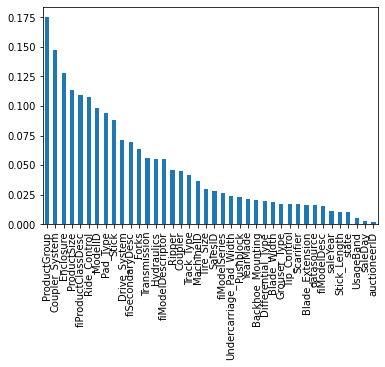

In [24]:
mutual_info.sort_values(ascending=False).plot.bar()

In [25]:
X_test.shape

(90000, 40)

In [26]:
X_test.drop(['Stick_Length'         
,'UsageBand'               
,'state'                 
,'saleDay',                   
'auctioneerID'],axis=1,inplace=True)

In [27]:
X_test.shape

(90000, 35)

In [28]:
X_train.shape

(210000, 40)

In [29]:
X_train.drop(['Stick_Length'         
,'UsageBand'               
,'state'                 
,'saleDay',                   
'auctioneerID'],axis=1,inplace=True)

In [30]:
X_train.shape

(210000, 35)

In [31]:
col_list = X_train.columns
for col in col_list:
    cnt = len(df[col].unique())
    print(col + " : " + str(cnt))

SalesID : 300000
MachineID : 257087
ModelID : 4420
datasource : 4
YearMade : 68
fiModelDesc : 4236
fiSecondaryDesc : 148
fiModelSeries : 97
fiModelDescriptor : 113
ProductSize : 7
fiProductClassDesc : 72
ProductGroup : 6
Drive_System : 5
Enclosure : 7
Forks : 3
Pad_Type : 5
Ride_Control : 4
Stick : 3
Transmission : 9
Blade_Extension : 3
Blade_Width : 7
Hydraulics : 13
Pushblock : 3
Ripper : 5
Scarifier : 3
Tip_Control : 4
Tire_Size : 18
Coupler : 4
Coupler_System : 3
Track_Type : 3
Undercarriage_Pad_Width : 20
Grouser_Type : 4
Backhoe_Mounting : 3
Differential_Type : 5
saleYear : 21


In [32]:
Duplicate=df

In [33]:
dfCopy = df.copy()
req_features=['Grouser_Type',
'Backhoe_Mounting',
'Differential_Type' ,
'Coupler ',
'Coupler_System',
'Track_Type',
'Pushblock ',
'Ripper ',
'Scarifier', 
'Tip_Control', 
'Ride_Control', 
'Stick ',
'Blade_Extension',
'Forks ',
'ProductGroup ',
'Drive_System' ,
'Enclosure',  
'ProductSize',
'datasource']

dropping = [i for i in df.columns if i not in req_features]
dropping

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Forks',
 'Pad_Type',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Tire_Size',
 'Coupler',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Blade_Type',
 'Travel_Controls',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfYear']

In [34]:
for i in dropping:
    dfCopy.drop(i, axis =1, inplace= True)

In [35]:
dfCopy.columns

Index(['datasource', 'ProductSize', 'Drive_System', 'Enclosure',
       'Ride_Control', 'Blade_Extension', 'Scarifier', 'Tip_Control',
       'Coupler_System', 'Track_Type', 'Grouser_Type', 'Backhoe_Mounting',
       'Differential_Type'],
      dtype='object')

In [36]:
X_train.shape

(210000, 35)

In [45]:
rfr=RandomForestRegressor(
    n_estimators=100,max_depth=25
) 
rfr.fit(X_train_sc,y_train) 
Y_pred=rfr.predict(X_test_sc) 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [39]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
print(r2_score(y_test,Y_pred))
print(mean_absolute_error(y_test,Y_pred))



0.8951499775363341
4722.851204971884
